In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("Covid Data.csv")
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [7]:
df.shape

(1048575, 21)

In [24]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
Altersgruppe            0
Mortality               0
dtype: int64

In [9]:
df.AGE.value_counts()

AGE
30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: count, Length: 121, dtype: int64

In [27]:
#df["AGE"].fillna((df["AGE"].mean()), inplace=True)

In [28]:
conditions =[df["AGE"]<=30, df["AGE"]>60]
choice = ["Jung", "Senior"]
df["Altersgruppe"] = np.select(conditions, choice, default='Mittel')
df["Altersgruppe"].value_counts()

Altersgruppe
Mittel    623016
Jung      281187
Senior    144372
Name: count, dtype: int64

In [11]:
df.groupby(["Altersgruppe","SEX"]).agg({"SEX":"sum"})

SEX
Altersgruppe SEX        
Jung         1    144439
             2    273496
Mittel       1    314703
             2    616626
Senior       1     65922
             2    156900

In [12]:
# 1- died, 0 - alive
df['Mortality'] = (df['DATE_DIED'] != '9999-99-99').astype(int)
df.groupby('Altersgruppe').agg({'Mortality':"sum"})


,Mortality
Altersgruppe,
Jung,2453
Mittel,32916
Senior,41573


<Axes: xlabel='AGE', ylabel='Count'>

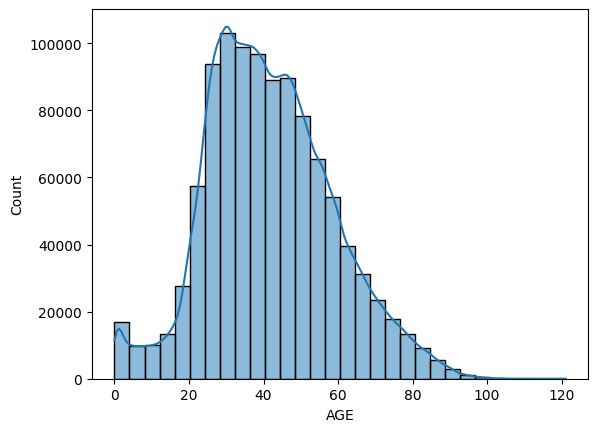

In [29]:
sns.histplot(df, x="AGE", kde=True, bins=30)

<Axes: xlabel='SEX', ylabel='AGE'>

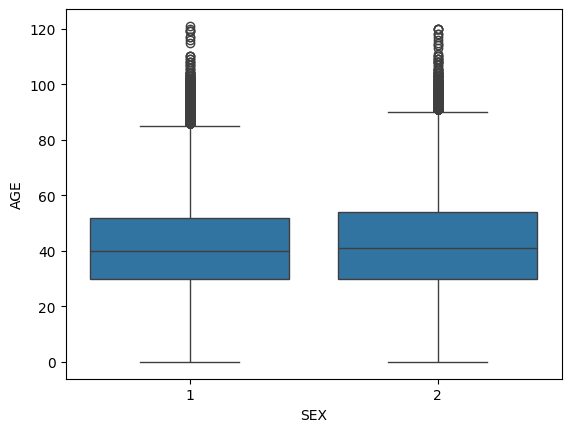

In [14]:
sns.boxplot(df, y="AGE", x="SEX")

<Axes: xlabel='Altersgruppe', ylabel='count'>

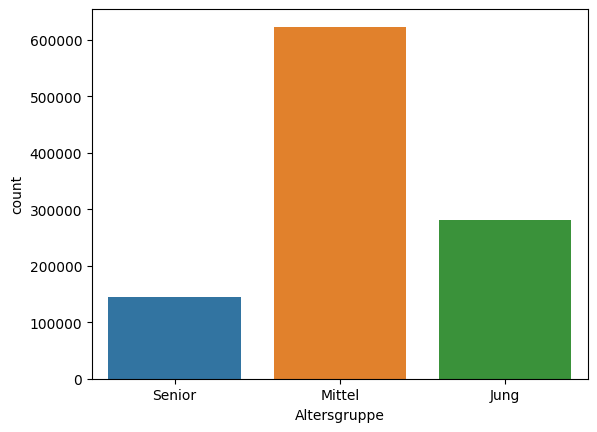

In [30]:
sns.countplot(df, x="Altersgruppe", hue="Altersgruppe")

<Axes: >

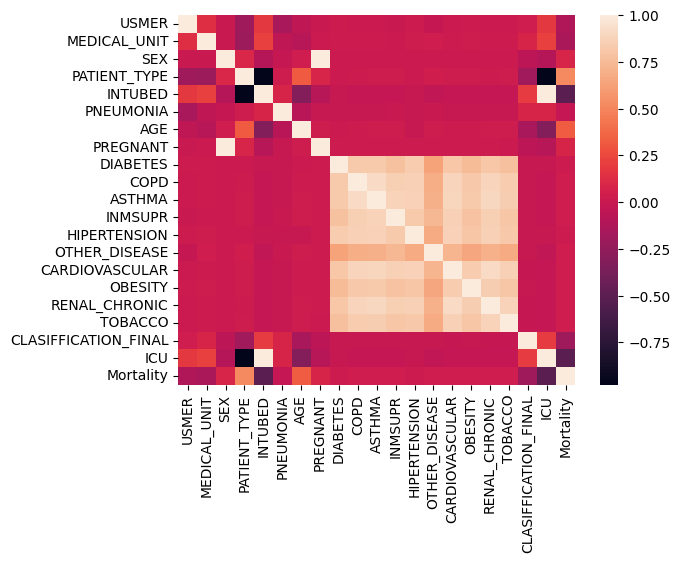

In [22]:
new_df = df.drop(['DATE_DIED', "Altersgruppe"], axis=1,inplace=False)
sns.heatmap(new_df.corr())



<Axes: title={'center': 'Boxplot'}, xlabel='SEX', ylabel='AGE'>

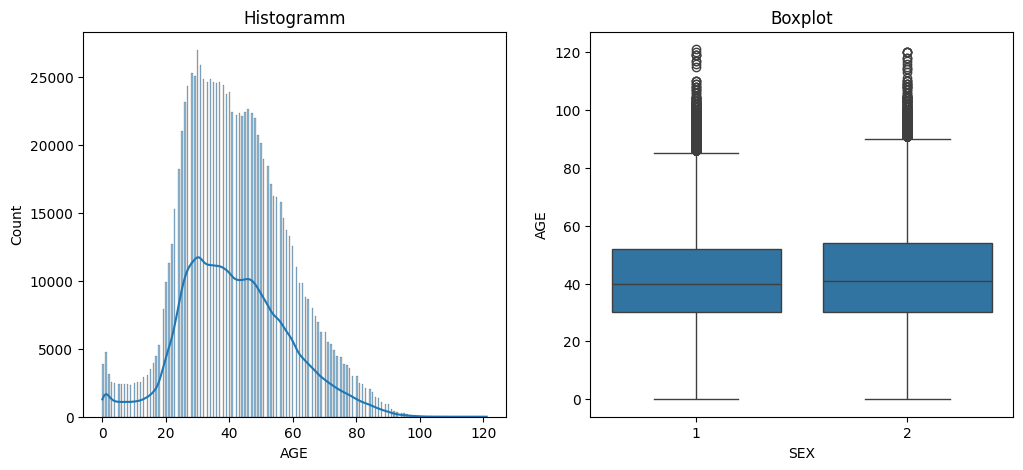

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5)) 

ax[0].set_title('Histogramm')
sns.histplot(df, x="AGE", kde=True, ax=ax[0])
ax[1].set_title("Boxplot")
sns.boxplot(df, y="AGE", x="SEX", ax=ax[1])